# Linear Regression on Vehicle MPG Prediction

Building a Linear Regression model to predict a vehicle’s MPG through other vehicle attributes.

## Context

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository.

## Content

Title: Auto-Mpg Data

## Sources

- Origin: This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University. 
- The dataset was used in the 1983 American Statistical Association Exposition.
- Date: July 7, 1993



## Dataset

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute “mpg”, 8 of the original instances were removed because they had unknown values for the “mpg” attribute. The original dataset is available in the file “auto-mpg.data original”. “The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.” (Quinlan, 1993)

- Number of Instances: 398

- Number of Attributes: 9 including the class attribute

- Attribute Information:
    - mpg: continuous
    - cylinders: multi-valued discrete
    - displacement: continuous
    - horsepower: continuous
    - weight: continuous
    - acceleration: continuous
    - model year: multi-valued discrete
    - origin: multi-valued discrete
    - car name: string (unique for each instance)


#### Acknowledgements

Dataset: UCI Machine Learning Repository

Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

## Implementation

### Import Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

### Loading Data

In [2]:
autoData = pd.read_csv("auto-mpg.csv")

In [3]:
autoData

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
autoData.shape

(392, 9)

### Exploratory Data Analysis

In [5]:
autoData.describe()

,mpg,cyl,displ,hp,weight,accel,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


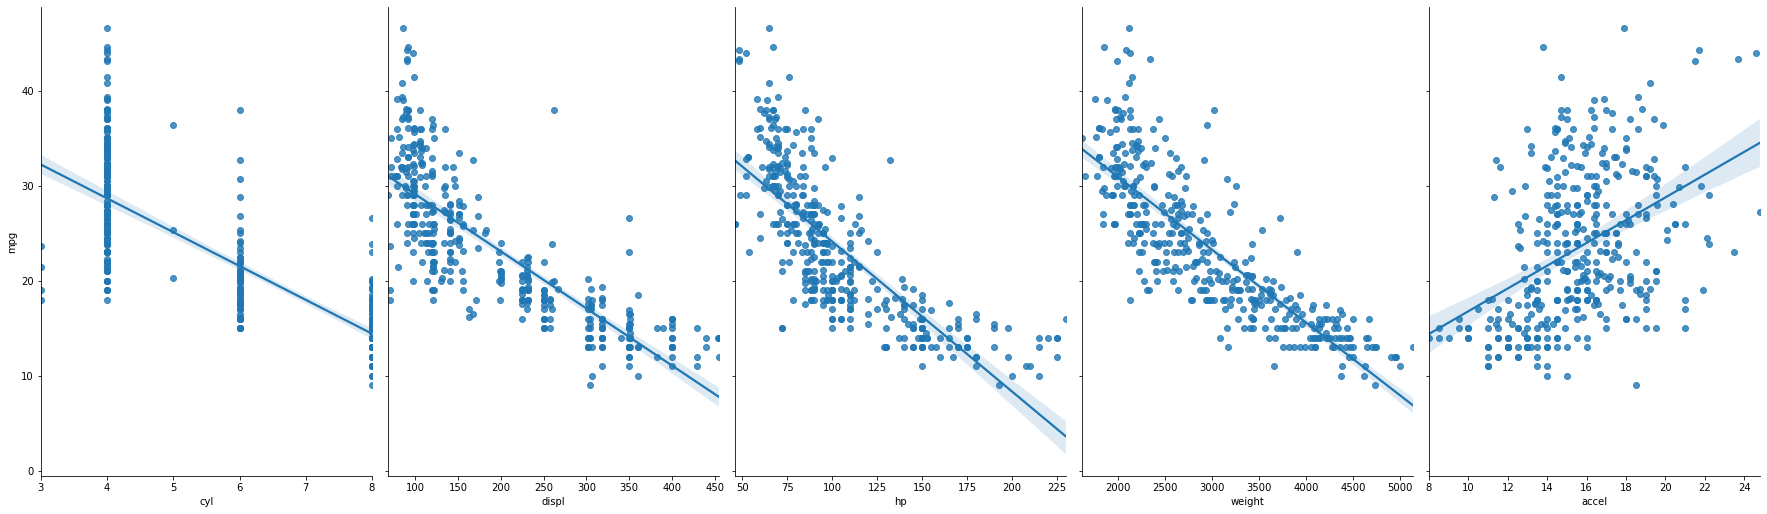

In [23]:
sns.pairplot(autoData, x_vars=['cyl','displ','hp', 'weight','accel'], y_vars='mpg', height=7, aspect=0.7, kind='reg')

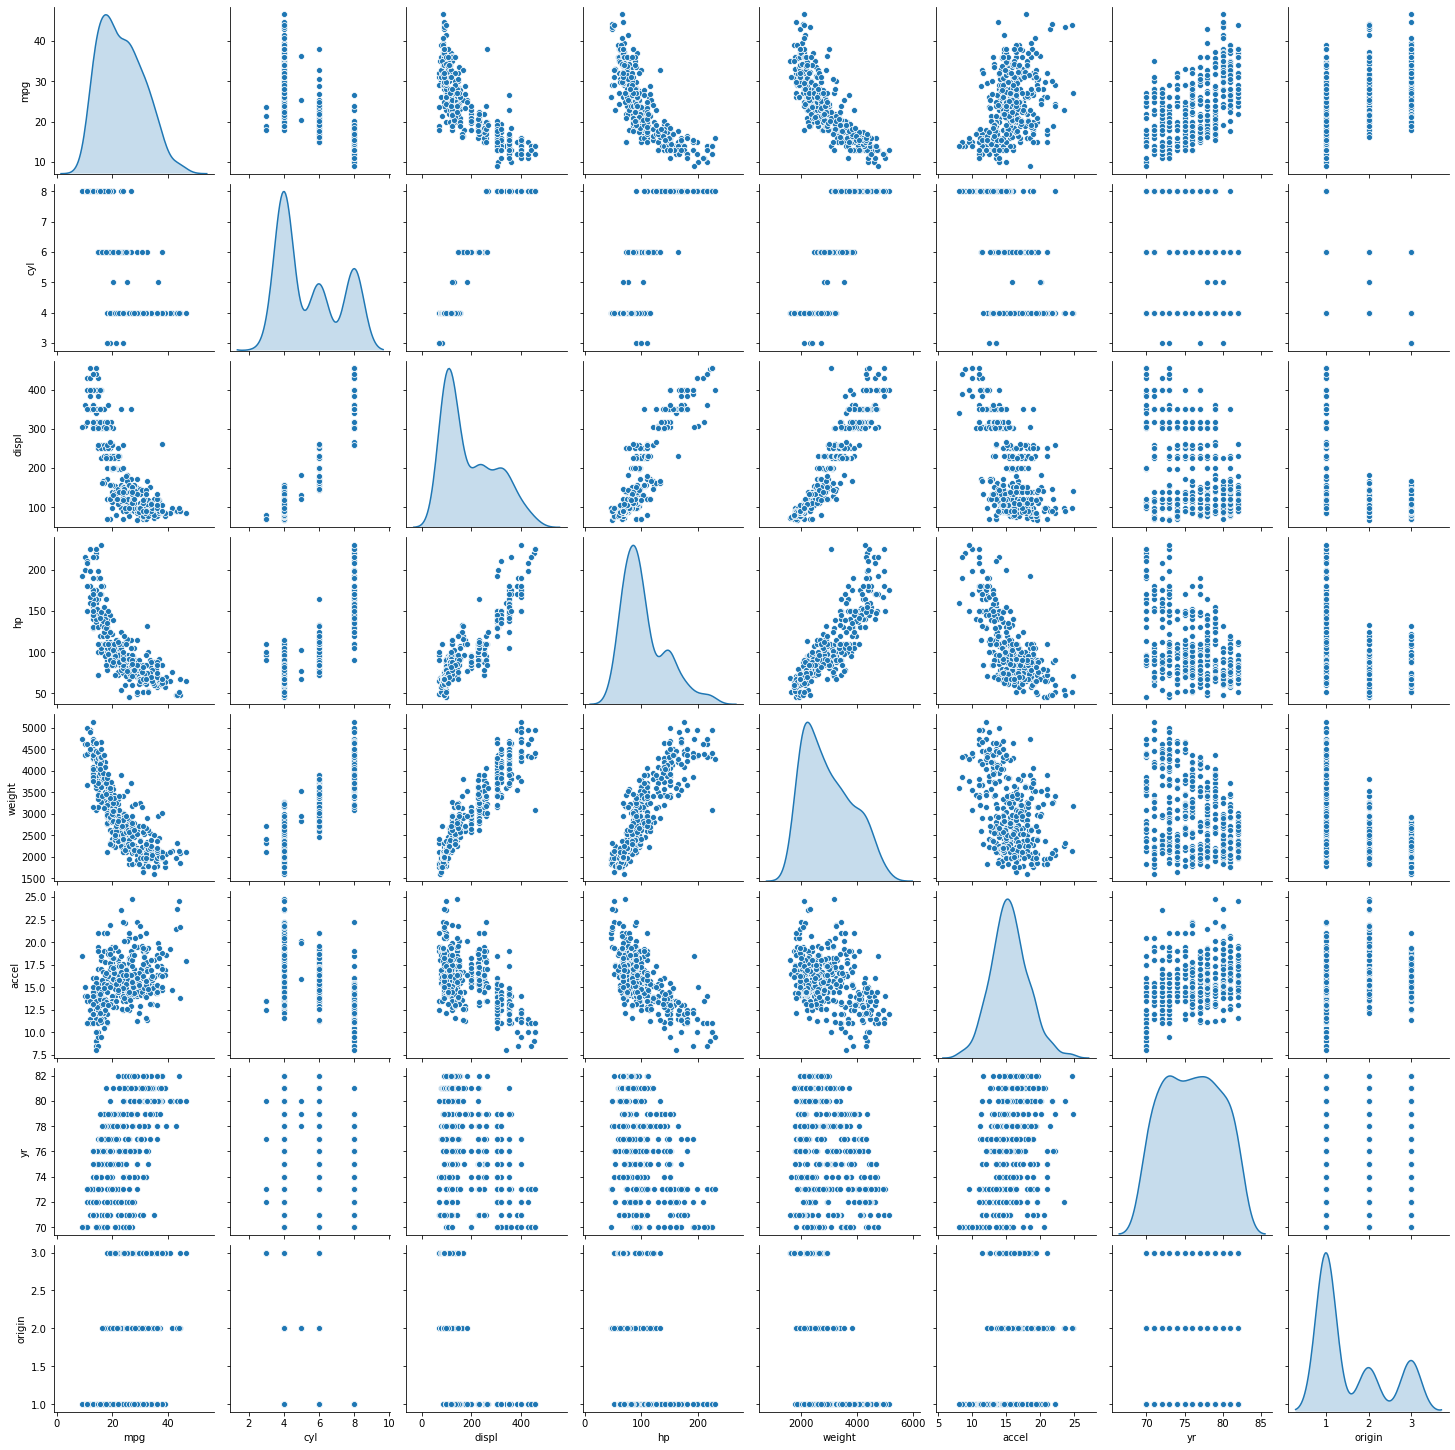

In [7]:
sns.pairplot(autoData, diag_kind='kde')

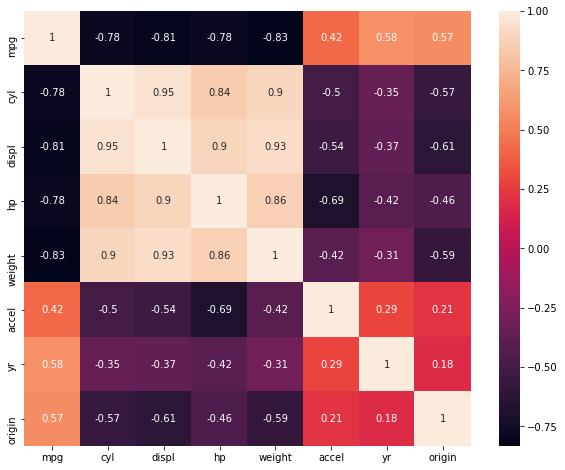

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(autoData.corr(), annot=True)
plt.show()

### Data Processing

In [9]:
autoData.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Drop unnecessary column

In [10]:
df = autoData.drop('name', axis=1)

In [11]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

#### Replace categorical variable with actual values

In [12]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


#### Convert Categorical Variables to Dummy Variables

In [13]:
df = pd.get_dummies(df, columns=['origin'])
df

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,1,0,0


#### Check for Missing Values

In [14]:
df.isnull().sum()

mpg               0
cyl               0
displ             0
hp                0
weight            0
accel             0
yr                0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

#### Check Data Types for Object

In [15]:
df.dtypes

mpg               float64
cyl                 int64
displ             float64
hp                  int64
weight              int64
accel             float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

### Linear Regression Model

#### Divide Data into dependent and independent variables

In [16]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [17]:
X = df.drop(['mpg'], axis=1)
y = df[['mpg']]

#### Split Data into Training vs Test Set

In [18]:
# Split X and y into training and test set by 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Train Linear Model

In [19]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### Model Coefficients & Intercept

In [20]:
print("*** Model Coefficients ***\n")
for idx, col_name in enumerate(X_train.columns):
    print("{}: {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("\n\n*** Model Intercept ***\n")
print("Intercept: {}".format(intercept))

*** Model Coefficients ***

cyl: -0.23250925374175183
displ: 0.024582595649820876
hp: -0.0014889032367739093
weight: -0.007611882424290447
accel: 0.2801326608622852
yr: 0.7746849712944135
origin_america: -1.773145588748062
origin_asia: 0.9472503470709653
origin_europe: 0.8258952416770968


*** Model Intercept ***

Intercept: -19.750891123310186


### Model Assessment

#### In-sample & Out-of-sample R-squared Score

In [21]:
print("In-sample Score: {}".format(regression_model.score(X_train, y_train)))
print("Out-of-sample Score: {}".format(regression_model.score(X_test, y_test)))

In-sample Score: 0.8205337631867142
Out-of-sample Score: 0.8242172817490032


#### Mean Squared Error (MSE) & Root Mean Squared Error (RMSE)

In [22]:
y_pred = regression_model.predict(X_test)

print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(mean_squared_error(y_test, y_pred, squared=False)))

MSE: 11.68664764720974
RMSE: 3.418573920103197
